In [12]:
import pandas as pd
import numpy as np

from importlib import reload

import plotly
import plotly.graph_objs as go
%matplotlib inline

In [13]:
import gameplan.helpers as hp
# import gameplan.income_streams
# import gameplan.expenses
# import gameplan.user
# import gameplan.cashflows
# import gameplan.assets

# reload(gameplan.helpers)
# reload(gameplan.income_streams)
# reload(gameplan.expenses)
# reload(gameplan.user)
# reload(gameplan.cashflows)
# reload(gameplan.assets)
from gameplan.income_streams import IncomeStream, Salary
from gameplan.user import User
# from gameplan.cashflows import CashFlow
# from gameplan.assets import Contribution, CashSavings

import gameplan

In [14]:
usr = User('example@gmail.com')
usr.user_id

'1022232228'

In [15]:
s = Salary(120000/24, payday_freq='SM', next_paycheck_dt=hp.get_offset_date('SM', pd.datetime(2019,7,4)))

Annual salary is $120,000


,salary
2020-05-15,5000.0
2020-05-31,5000.0
2020-06-15,5000.0
2020-06-30,5000.0
2020-07-15,5000.0


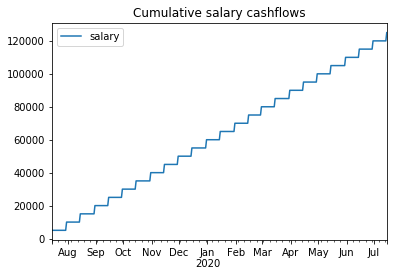

In [16]:
print(f"Annual salary is ${s.annualized_salary:,.0f}")
s.plot_cash_flows(cumulative=True, title='Cumulative salary cashflows')
s.cash_flows_df.tail()

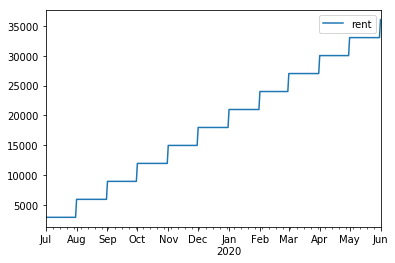

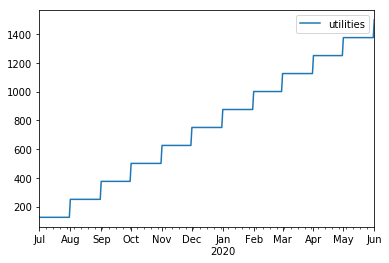

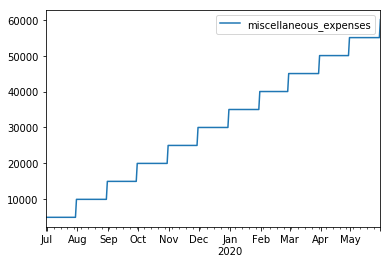

In [17]:
r = gameplan.expenses.Rent(3000)
u = gameplan.expenses.Utilities(125)
misc = gameplan.expenses.Expense(
    expense_type='miscellaneous_expenses', 
    amount=5000, 
    recurring=True, 
    start_dt=pd.datetime.today(),
    freq='M'
)

expenses = [r, u, misc]
for exp in expenses: 
    exp.plot_cash_flows()

In [18]:
usr.add_income_stream(s)
for exp in expenses:
    usr.add_expense(exp)

In [19]:
usr.all_cashflows.agg_cash_flows('Q')

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-06-30,0.0,0.0,0.0,-5000.0,-5000.0
2019-09-30,30000.0,-9000.0,-375.0,-15000.0,5625.0
2019-12-31,30000.0,-9000.0,-375.0,-15000.0,5625.0
2020-03-31,30000.0,-9000.0,-375.0,-15000.0,5625.0
2020-06-30,30000.0,-9000.0,-375.0,-10000.0,10625.0
2020-09-30,5000.0,0.0,0.0,0.0,5000.0


In [21]:
usr.all_cashflows.total.head()

2019-06-30   -5000.0
2019-07-01   -3125.0
2019-07-15    5000.0
2019-07-31       0.0
2019-08-01   -3125.0
Name: total_net_cash_flow, dtype: float64

In [27]:
usr.all_cashflows.agg_cash_flows('D').head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-06-30,0.0,0.0,0.0,-5000.0,-5000.0
2019-07-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-07-02,0.0,0.0,0.0,0.0,0.0
2019-07-03,0.0,0.0,0.0,0.0,0.0
2019-07-04,0.0,0.0,0.0,0.0,0.0


In [36]:
usr.expenses.total.tail()

2020-04-01   -3125.0
2020-04-30   -5000.0
2020-05-01   -3125.0
2020-05-31   -5000.0
2020-06-01   -3125.0
Name: total_net_expense, dtype: float64

In [37]:
usr.income_streams.total.tail()

2020-05-15    5000.0
2020-05-31    5000.0
2020-06-15    5000.0
2020-06-30    5000.0
2020-07-15    5000.0
Freq: SM-15, Name: total_net_income_stream, dtype: float64

In [39]:
usr.all_cashflows.as_df.head()

,salary,rent,utilities,miscellaneous_expenses,total_net_cash_flow
2019-06-30,0.0,0.0,0.0,-5000.0,-5000.0
2019-07-01,0.0,-3000.0,-125.0,0.0,-3125.0
2019-07-15,5000.0,0.0,0.0,0.0,5000.0
2019-07-31,5000.0,0.0,0.0,-5000.0,0.0
2019-08-01,0.0,-3000.0,-125.0,0.0,-3125.0


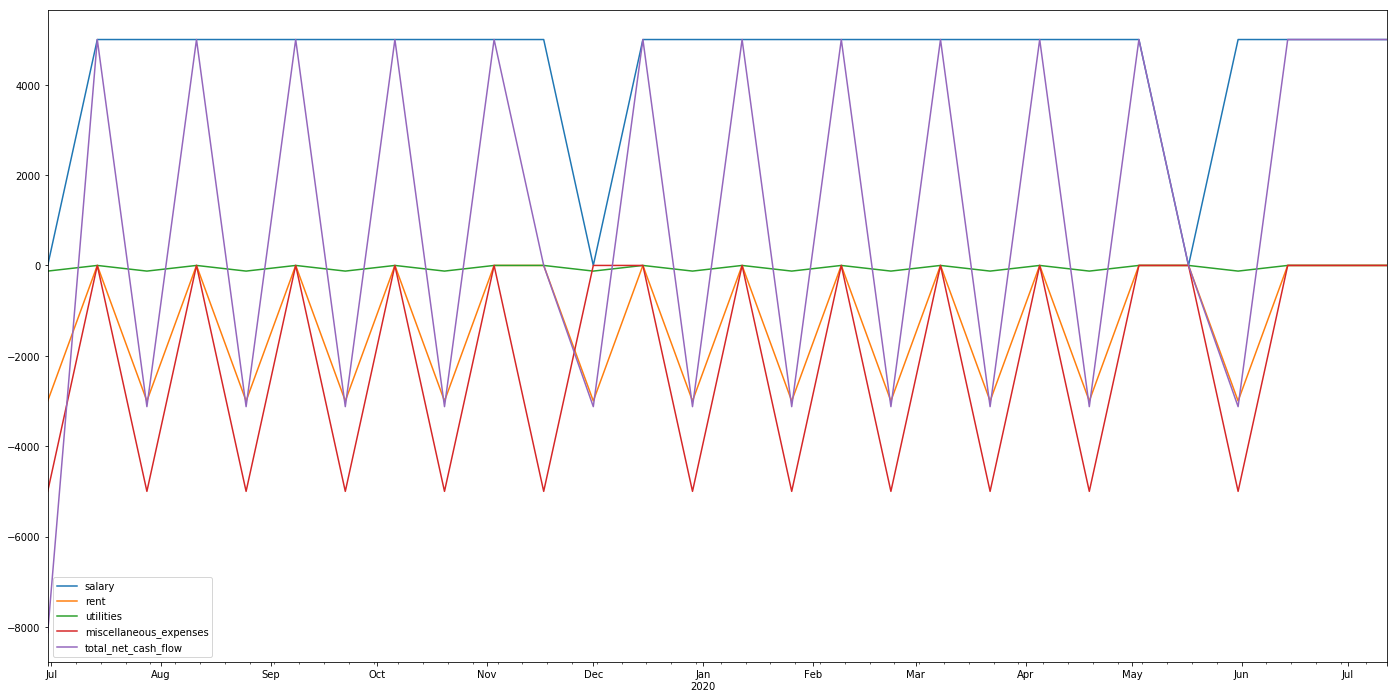

In [40]:
usr.all_cashflows.agg_cash_flows('14D').plot(figsize=(24,12))

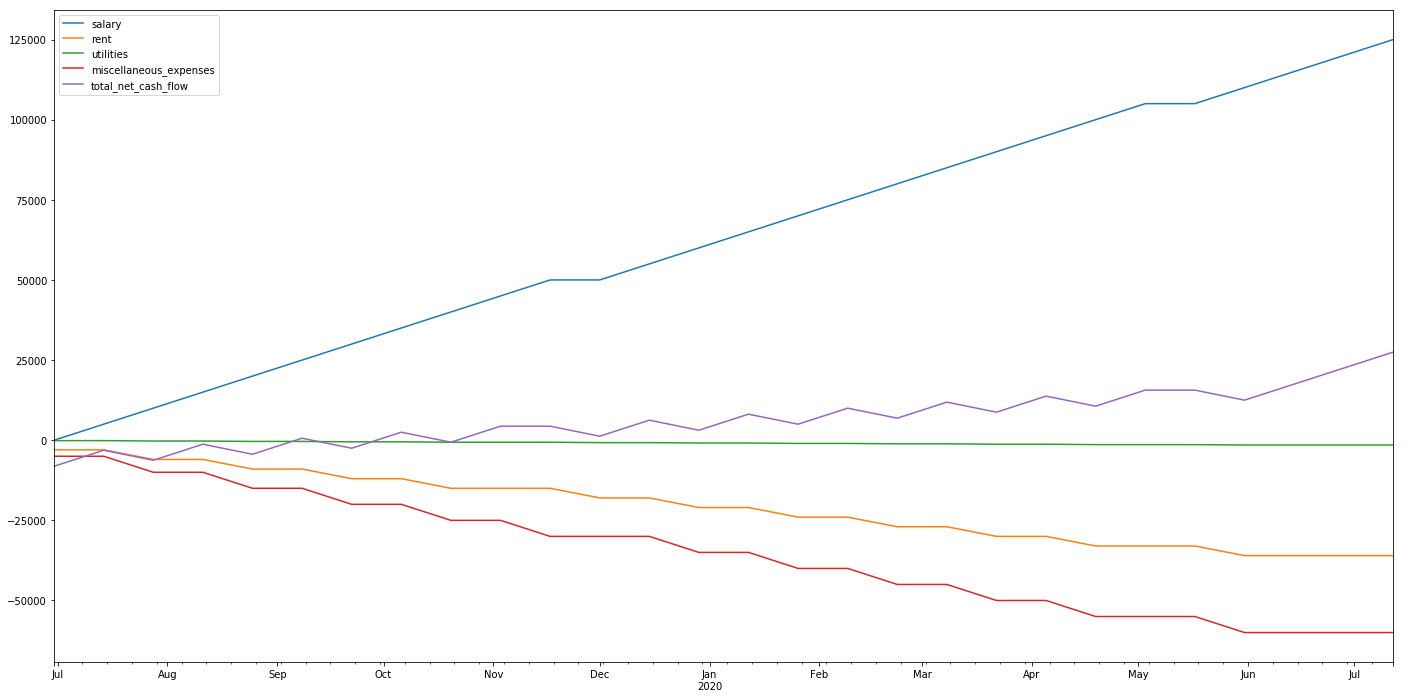

In [44]:
usr.all_cashflows.agg_cash_flows('14D').cumsum().plot(figsize=(24,12))

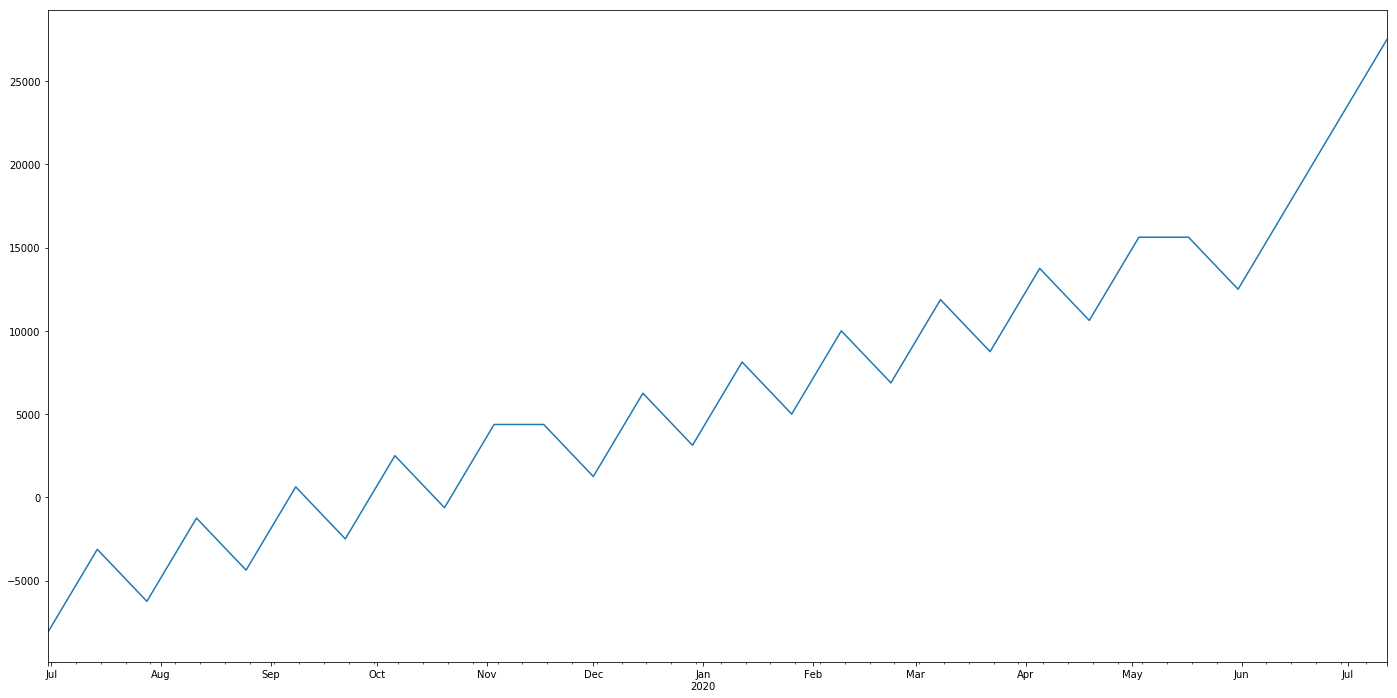

In [46]:
usr.all_cashflows.agg_cash_flows('14D').cumsum()['total_net_cash_flow'].plot(figsize=(24,12))

In [49]:
s.name

'salary'

In [51]:
gameplan.contributions.Contribution.from_income_stream(s, pct=.05)

In [55]:
from gameplan.contributions import Contribution
from gameplan.assets import CashSavings

In [54]:
c = Contribution.from_income_stream(s, pct=0.05, label='salary_5%')

In [56]:
cs = CashSavings(initial_balance=12000)

In [59]:
c.name

'salary_5%'

In [60]:
lab = c.name

In [62]:
cs.contributions.add_object(c, label='salary_5')

ValueError: Label 'salary_5' already exists. If you want to overwrite it, set if_exists to 'overwrite'

In [ ]:
def add_contribution(self, contribution, label=None, if_exists='error'):
        self.contributions.add_object(contribution, label, if_exists)

In [ ]:
agameplan.collections.Contributions.add_object(c)

In [ ]:
gameplan.assets.Asset

## Testing/Scratchwork

In [25]:
hp.get_offset_date('MS')

Timestamp('2019-07-01 15:28:31.628919')

In [26]:
# Fixed payments - Lets assume you want to pay XX per month
# Minimum payments - Lets assume you make minimum payments
# Goal-based - Lets assume you want to pay back w/in XX years


In [27]:
iss = InterestRateSeries(.063, name='6.3% Fixed Rate', freq='M')

NameError: name 'InterestRateSeries' is not defined

In [88]:
# sd = StudentDebt(30000, 0.055)

In [ ]:
# TO DO:
1. (Maybe) Allow CashFlow to be instantiated w/ an existing CashFlow? A Series w/ variable $ amount?
2. CashFlows should be able to grow (change) through time rather than being fixed
# 3. Instantiate CashFlow from a series

In [3]:

{} is empty

NameError: name 'empty' is not defined

In [18]:
from gameplan.assets import CashSavings

In [19]:
cash = CashSavings(initial_balance=20000)

In [23]:
from gameplan.contributions import Contribution

In [27]:
cash.contributions.add_object(Contribution.from_income_stream(s, pct=.12, label='salary_savings_2'))

In [ ]:
# All Net Positive cashflows go to cash savings

In [36]:
def add_2(x): return x + 2

In [37]:
class Test():
    def __init__(self, val=0):
        self.val = val
        setattr(self, 'plus_2', add_2(self.val))

In [38]:
tst = Test(val=2)

In [41]:
tst.val = 5

In [44]:
getattr(None, 'blah', 'k')

'k'

In [ ]:
setattr()

In [35]:
usr.cash_flows_df

,salary,total_income,rent,utilities,miscellaneous_expenses,total_expenses
2019-06-30,0.0,0.0,-0.0,-0.0,-5000.0,-5000.0
2019-07-01,0.0,0.0,-3000.0,-125.0,-0.0,-3125.0
2019-07-15,5000.0,5000.0,0.0,0.0,0.0,0.0
2019-07-31,5000.0,5000.0,-0.0,-0.0,-5000.0,-5000.0
2019-08-01,0.0,0.0,-3000.0,-125.0,-0.0,-3125.0
2019-08-15,5000.0,5000.0,0.0,0.0,0.0,0.0
2019-08-31,5000.0,5000.0,-0.0,-0.0,-5000.0,-5000.0
2019-09-01,0.0,0.0,-3000.0,-125.0,-0.0,-3125.0
2019-09-15,5000.0,5000.0,0.0,0.0,0.0,0.0
2019-09-30,5000.0,5000.0,-0.0,-0.0,-5000.0,-5000.0


In [33]:
Contribution.from_cashflow(usr.net_cash_flow, cashflow_type='net_cashflow')

AttributeError: 'Series' object has no attribute 'date_range'

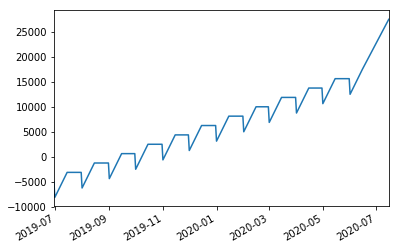

In [31]:
usr.net_cash_flow.cumsum().plot()

In [29]:
cash.contributions.contributions_df

,salary_savings,salary_savings_2,total_contributions
2019-07-15,750.0,600.0,1350.0
2019-07-31,750.0,600.0,1350.0
2019-08-15,750.0,600.0,1350.0
2019-08-31,750.0,600.0,1350.0
2019-09-15,750.0,600.0,1350.0
2019-09-30,750.0,600.0,1350.0
2019-10-15,750.0,600.0,1350.0
2019-10-31,750.0,600.0,1350.0
2019-11-15,750.0,600.0,1350.0
2019-11-30,750.0,600.0,1350.0


In [66]:
!pip install cashflows

  Running setup.py install for cashflows ... done
You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [67]:
import cashflows

In [69]:
cashflows.Loan??

In [70]:
cashflows.loan.fixed_rate_loan(12000, .045, 30, pd.datetime.today())

/Users/davidbrodsky/.pyenv/versions/3.7.3/envs/db_env/lib/python3.7/site-packages/cashflows/loan.py:40: UserWarning:

Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access



,Beg_Ppal_Amount,Nom_Rate,Tot_Payment,Int_Payment,Ppal_Payment,End_Ppal_Amount
2019,12000.000000,0.045,0.000000,0.000000,0.000000,1.200000e+04
2020,12000.000000,0.045,402.796067,5.400000,397.396067,1.160260e+04
2021,11602.603933,0.045,402.796067,5.221172,397.574895,1.120503e+04
2022,11205.029038,0.045,402.796067,5.042263,397.753804,1.080728e+04
2023,10807.275234,0.045,402.796067,4.863274,397.932793,1.040934e+04
2024,10409.342441,0.045,402.796067,4.684204,398.111863,1.001123e+04
2025,10011.230578,0.045,402.796067,4.505054,398.291013,9.612940e+03
2026,9612.939565,0.045,402.796067,4.325823,398.470244,9.214469e+03
2027,9214.469321,0.045,402.796067,4.146511,398.649556,8.815820e+03
2028,8815.819766,0.045,402.796067,3.967119,398.828948,8.416991e+03


In [ ]:
Portfolio = [
Consumption,
Debt servicing costs
IncomeStreams = active (salary) + passive (asset-based),


Assets,
Liabilities 
]

In [74]:
# from gameplan.expenses import Expense
from gameplan.assets import Asset, CashSavings
from gameplan.liabilities import Liability
from gameplan.collections import Expenses, IncomeStreams, Collection 

In [ ]:
class Portfolio():
    def __init__(self):
        self.assets = Collection(collection_type=Asset, objects={
            CashSavings(initial_balance=0, annualized_interest_rate=0.0)
        })
        self.liablities = Collection(collection_type=Liability, objects={})
        self.income_streams = IncomeStreams(income_streams={}) # includes salary, etc.
        self.consumption = Expenses(expenses={}) #+ ...


    @property
    def income_streams_from_assets(self):
        pass

    @property
    def debt_service_from_liabilities(self):
        pass

    def transfer_value(from, to, amt=None, pct=None):
        pass
    
    @property
    def portfolio_cashflows(self):
        pass
    
    @property
    def portfolio_pv(self): # aka net_worth?
        pass
    
    
    def simulate_portfolio_value(self):
        pass
    
    def plot_portfolio_value(self):
        pass
    
    #TO DO: Each of these functions should probs be defined at the IncomeStream/Asset/Liability/Expense level as well?
    #TO DO: Add functionality to add objects to each of the collections (i.e. add asset/liability//etc.)